In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [5]:


# Read oil price and transform data

xls_file=pd.ExcelFile("C:/Users/neil.watt/Documents/PythonScripts/OilIndustryAnalysis/RBRTEd.xls") # Read Excel
brent=xls_file.parse("Data 1") # Read sheet Data 1
brent.columns=brent.iloc[1] # set row 1 as column name
brent=brent.ix[2:] # remove first 2 rows
brent["Date"]=brent["Date"].astype('datetime64[ns]') # Convert column to date format
brent.columns=["date","oil_price"]
brent.head()


,date,oil_price
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.6
6,1987-05-26,18.63


In [7]:
# Loop to read all share price files and transform data
shares=["RDSB.L","BP.L","CNE.L","PMO.L","STL.OL","FP.PA","REP.MC","ENGI.PA","SLB.PA"]

all_data=pd.DataFrame() # here we will store all the data from all shares and oil price in a master dataframe
for index in range(len(shares)):
    stock=pd.DataFrame()

# 1.- Read files
    stock=pd.read_csv("C:/Users/neil.watt/Documents/PythonScripts/OilIndustryAnalysis/"+shares[index]+".csv")     
# 2.- Transform data
    stock=stock[["Date","Close"]]       
    stock["Date"]=stock["Date"].astype('datetime64[ns]')
    stock.columns=["date","share_price"]
    test=pd.DataFrame(brent) # VLOOKUP equivalent in Python to merge 2 sets of data
    output=stock.merge(test,on="date",how="left")
    stock["oil_price"]=output["oil_price"]
    stock['share_price']=pd.to_numeric(stock['share_price'], errors='coerce').dropna(0)
    stock['oil_price']=pd.to_numeric(stock['oil_price'], errors='coerce').dropna(0)
    stock["year"]=pd.to_datetime(stock["date"]).dt.year # Create a column with the year to filter later
    stock["name"]=shares[index]
    stock = stock.dropna() # get rid of all the NAN rows.
# 3.- Feature Engineering. Create new column with scaled share price from 0 to 1.
#     This will help us comparing companies later on.
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    stock["share_price_scaled"]=scaler.fit_transform(stock["share_price"].to_frame())
# 4.- Append data to a master dataframe
    all_data=all_data.append(stock) #append data to one matrix
    
all_data.head()

,date,share_price,oil_price,year,name,share_price_scaled
0,2000-05-15,1193.597412,28.26,2000,RDSB.L,0.309123
1,2000-05-16,1191.409302,28.78,2000,RDSB.L,0.307755
2,2000-05-17,1164.911255,28.40,2000,RDSB.L,0.291187
3,2000-05-18,1204.315063,28.90,2000,RDSB.L,0.315824
4,2000-05-19,1215.334106,29.01,2000,RDSB.L,0.322714


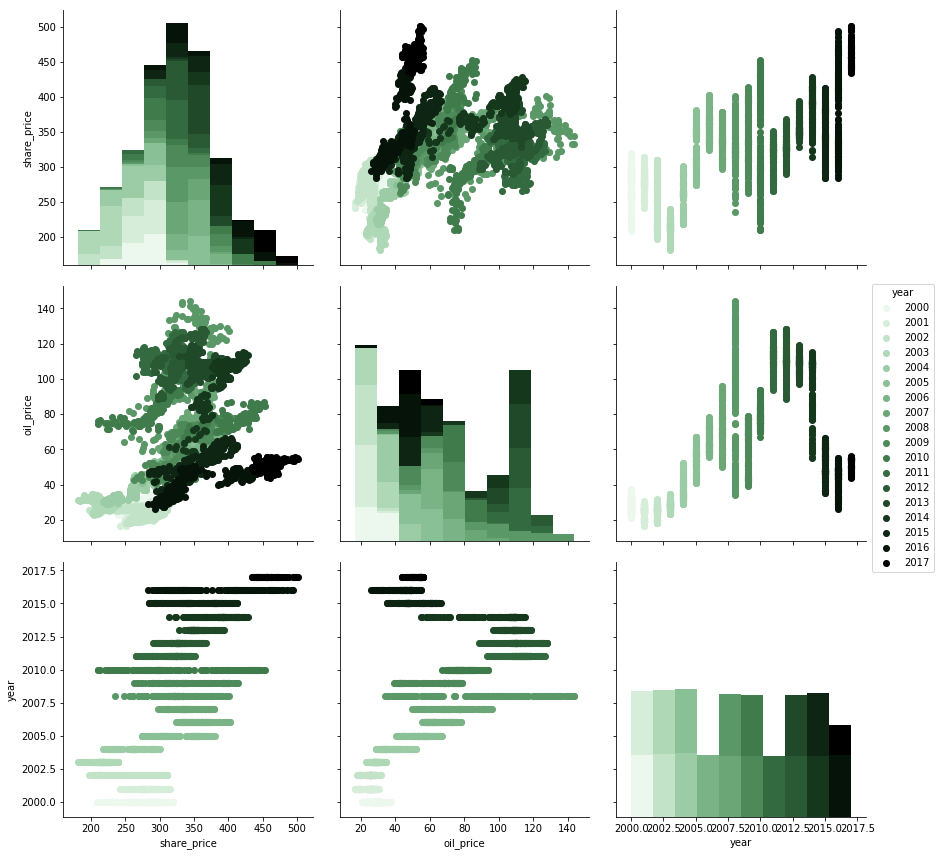

In [8]:
#==============================================================================
# Pairplot using master data table (all_data) with a filter on BP share price
#==============================================================================
palette=sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data[all_data['name']=="BP.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))